In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("C:/Users/abc/Desktop/Assignments/Assignment 4/Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
#Prediction model for Salary from year of exp.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
# correlation in between -1 to 1 and correlation itself is 1.
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [7]:
import matplotlib.pyplot as plt

<AxesSubplot:>

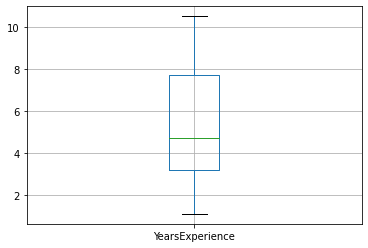

In [8]:
data.boxplot(["YearsExperience"])

<AxesSubplot:>

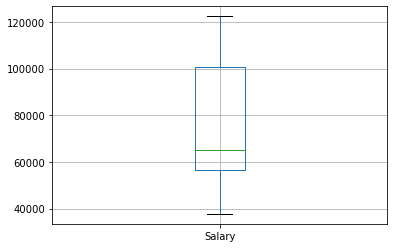

In [9]:
data.boxplot(["Salary"])

Text(0, 0.5, 'Salary')

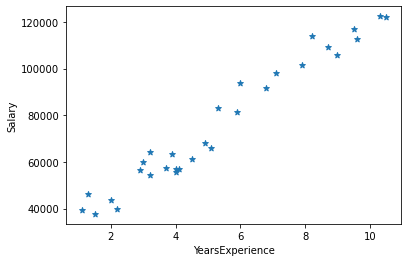

In [10]:
plt.scatter(data.YearsExperience,data.Salary,marker='*')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [11]:
import seaborn as sns

C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

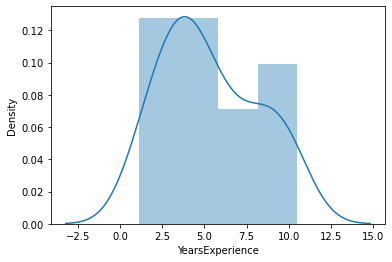

In [12]:
sns.distplot(data['YearsExperience'])

In [14]:
# distribution look like rightly skewed data need to Transform using log function
data["log_YearsExperience"]=np.log(data["YearsExperience"]+1)

C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_YearsExperience', ylabel='Density'>

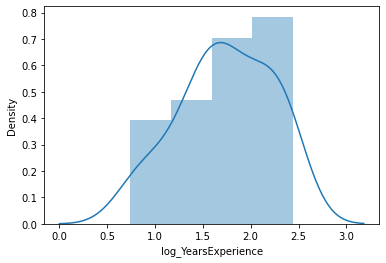

In [15]:
sns.distplot(data['log_YearsExperience'])

C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

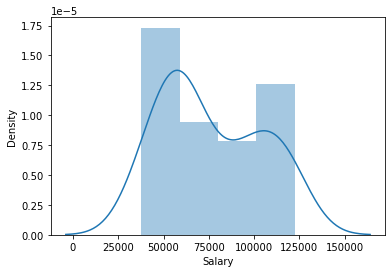

In [16]:
sns.distplot(data['Salary'])

In [17]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~log_YearsExperience",data = data).fit()

<AxesSubplot:xlabel='log_YearsExperience', ylabel='Salary'>

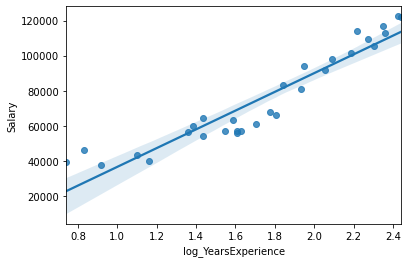

In [18]:
sns.regplot(x="log_YearsExperience", y="Salary", data=data)

In [19]:
#coefficient
model.params

Intercept             -16452.302277
log_YearsExperience    53271.412821
dtype: float64

In [20]:
#t & p-values from p values we know the coff of x is zero or not.
print(model.tvalues, '\n', model.pvalues)

Intercept              -2.644069
log_YearsExperience    15.413104
dtype: float64 
 Intercept              1.327164e-02
log_YearsExperience    3.302453e-15
dtype: float64


In [21]:
#R squared values (model is good or not our model is very good model)
(model.rsquared,model.rsquared_adj)

(0.8945639276190438, 0.8907983536054382)

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 10 May 2021   Prob (F-statistic):           3.30e-15
Time:                        19:54:45   Log-Likelihood:                -314.88
No. Observations:                  30   AIC:                             633.8
Df Residuals:                      28   BIC:                             636.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.645e+04   6222.341     -2.644      0.013   -2.92e+04   -3706.414
log_YearsExperience  5.327e+04   3456.242     15.413      0.000    4.62e+04    6.04e+04
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.678
Skew:                           0.048   Prob(JB):                        0.712
Kurtosis:                       2.270   Cond. No.                         8.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""